In [9]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
from PIL import Image

import os
import numpy as np
import matplotlib.pyplot as plt

#PATH = 'C:\\Users\\Daniel\\Documents\\GitHub\\flower-id\\nonResized'
PATH = 'C:\\Users\\tonylizj\\Documents\\GitHub\\flower-id\\nonResized'

In [10]:
train_dir = os.path.join(PATH, 'train')
#train_dir = os.path.join('C:\\Users\\tonylizj\\Documents\\GitHub\\flower-id\\flowers', 'train')
validation_dir = os.path.join(PATH, 'validation')
#validation_dir = os.path.join('C:\\Users\\tonylizj\\Documents\\GitHub\\flower-id\\flowers', 'validation')
print(train_dir)

C:\Users\tonylizj\Documents\GitHub\flower-id\nonResized\train


In [11]:
batch_size = 128
epochs = 20
IMG_HEIGHT = 200
IMG_WIDTH = 200
total_train = 2850
total_val = 1473

print("Training images: " + str(total_train))
print("Validation images: " + str(total_train))

Training images: 2850
Validation images: 2850


In [12]:
train_image_generator = ImageDataGenerator(rescale=1./255,
                                           rotation_range=45,
                                           width_shift_range=.15,
                                           height_shift_range=.15,
                                           horizontal_flip=True,
                                           zoom_range=0.5)
validation_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

sample_training_images, _ = next(train_data_gen)

Found 2850 images belonging to 5 classes.
Found 1473 images belonging to 5 classes.


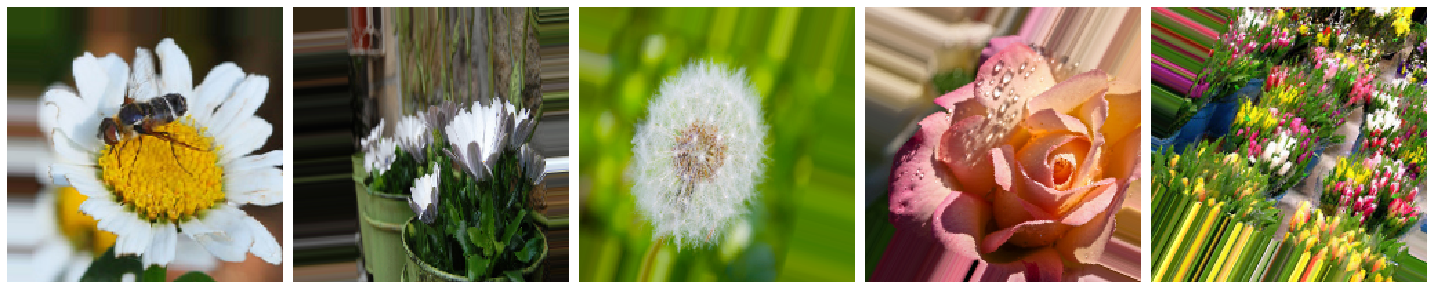

In [13]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


plotImages(sample_training_images[:20])

In [14]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [15]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [16]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/20
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
22/22 [==============================] - 90s 4s/step - loss: -15.2410 - accuracy: 0.2406 - val_loss: -15.3441 - val_accuracy: 0.2393
Epoch 2/20
22/22 [==============================] - 94s 4s/step - loss: -16.0784 - accuracy: 0.2436 - val_loss: -15.3441 - val_accuracy: 0.2393
Epoch 3/20
22/22 [==============================] - 101s 5s/step - loss: -15.7370 - accuracy: 0.2480 - val_loss: -15.3441 - val_accuracy: 0.2393
Epoch 4/20
22/22 [==============================] - 100s 5s/step - loss: -15.9887 - accuracy: 0.2388 - val_loss: -15.3441 - val_accuracy: 0.2393
Epoch 5/20
22/22 [==============================] - 100s 5s/step - loss: -15.5701 - accuracy: 0.2517 - val_loss: -15.3441 - val_accuracy: 0.2393
Epoch 6/20
22/22 [==============================] - 103s 5s/step - loss: -16.2371 - accuracy: 0.2411 - val_loss: -15.3441 - val_accuracy: 0.2393
Epoch 7/20
22/22 [====================

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

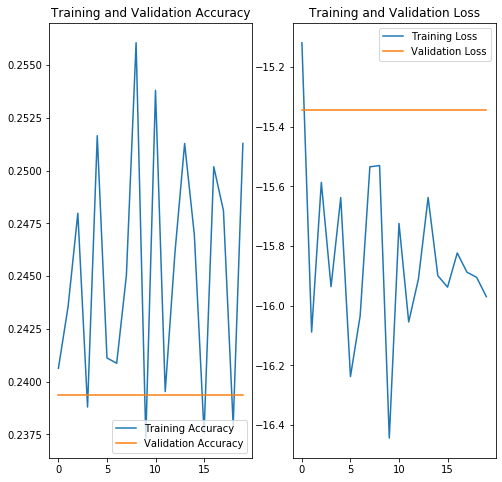

In [18]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
